In [2]:
import pickle
import matplotlib.pyplot as plt
import os

In [3]:
def evaluate_loss(PATH, dad, epochs_3=None, steps_per_epoch_3=None):
    """
    PATH: path of the foloder containing the output files
    dad: string, "only", "first" or "second"
    """

    with open(os.path.join(PATH, 'tau.pkl'), 'rb') as file:
        tau = pickle.load(file)

    with open(os.path.join(PATH, 'design_loss.pkl'), 'rb') as file:
        design_loss = pickle.load(file)

    if dad == "only":
        return {"n_steps_1": len(design_loss), "tau_step_1": tau, "design_loss_step_1": design_loss}

    else:
        with open(os.path.join(PATH, 'bf_loss.pkl'), 'rb') as file:
            bf_loss = pickle.load(file)["loss"]
        n_steps_3 = epochs_3 * steps_per_epoch_3

        if dad == "first":
            n_steps_1 = len(design_loss) - n_steps_3
            epochs_2 = len(bf_loss) - epochs_3
            design_loss_step_1 = design_loss[0:n_steps_1]
            design_loss_step_3 = design_loss[n_steps_1:]
            bf_loss_step_2 = bf_loss[0:epochs_2]
            bf_loss_step_3 = bf_loss[epochs_2:]
            tau_step_3 = tau
            return {"n_steps_1": n_steps_1, "epochs_2": epochs_2, "n_steps_3": n_steps_3, "epochs_3": epochs_3,
                    "design_loss_step_1": design_loss_step_1, "design_loss_step_3": design_loss_step_3, 
                    "bf_loss_step_2": bf_loss_step_2, "bf_loss_step_3": bf_loss_step_3,
                    "tau_step_3": tau_step_3}
        
        else:
            epochs_1 = len(bf_loss) - epochs_3
            n_steps_2 = len(design_loss) - n_steps_3
            bf_loss_step_1 = bf_loss[0:epochs_1]
            bf_loss_step_3 = bf_loss[epochs_1:]
            design_loss_step_2 = design_loss[0:n_steps_2]
            design_loss_step_3 = design_loss[n_steps_2:]
            tau_step_2 = tau[0:n_steps_2]
            tau_step_3 = tau[n_steps_2:]
            return {"epochs_1": epochs_1, "n_steps_2": n_steps_2, "n_steps_3": n_steps_3, "epochs_3": epochs_3,
                    "bf_loss_step_1": bf_loss_step_1, "bf_loss_step_3": bf_loss_step_3, 
                    "design_loss_step_2": design_loss_step_2, "design_loss_step_3": design_loss_step_3,
                    "tau_step_2": tau_step_2, "tau_step_3": tau_step_3}

## DAD first

Train DAD with predictive samples -> Train bayeflow with DAD generating xi -> joint training

In [4]:
path = "results/" + "dad_first_t_5"
out = evaluate_loss(path, "first", epochs_3 = 1000, steps_per_epoch_3 = 1)

In [5]:
out

{'n_steps_1': 1000,
 'epochs_2': 400,
 'n_steps_3': 1000,
 'epochs_3': 1000,
 'design_loss_step_1': [-0.9463487267494202,
  -0.9481635689735413,
  -0.934795618057251,
  -1.008100152015686,
  -1.0872018337249756,
  -1.183318853378296,
  -1.237560749053955,
  -1.356494665145874,
  -1.444488525390625,
  -1.4464061260223389,
  -1.5320347547531128,
  -1.5838309526443481,
  -1.5849131345748901,
  -1.657442331314087,
  -1.7924238443374634,
  -1.7989846467971802,
  -1.886596441268921,
  -1.9501017332077026,
  -2.028108596801758,
  -2.1075992584228516,
  -2.122072219848633,
  -2.191965341567993,
  -2.285428524017334,
  -2.3069112300872803,
  -2.366353988647461,
  -2.428445816040039,
  -2.5555453300476074,
  -2.577073335647583,
  -2.617760419845581,
  -2.716219663619995,
  -2.6313674449920654,
  -2.760308265686035,
  -2.7834231853485107,
  -2.8581104278564453,
  -2.8554511070251465,
  -2.9548234939575195,
  -2.959139585494995,
  -2.9969074726104736,
  -3.0128097534179688,
  -3.050175428390503,
 

### stage 1

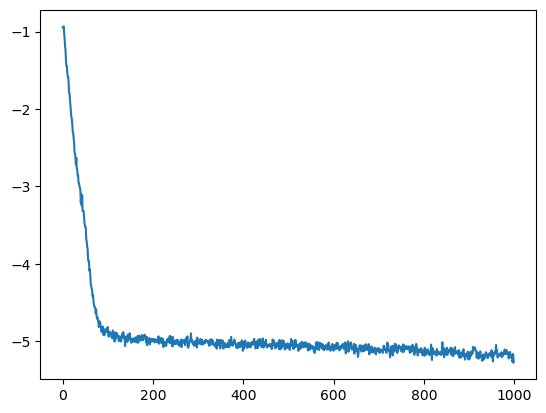

In [59]:
plt.plot(range(out["n_steps_1"]), out["design_loss_step_1"])

### stage 2

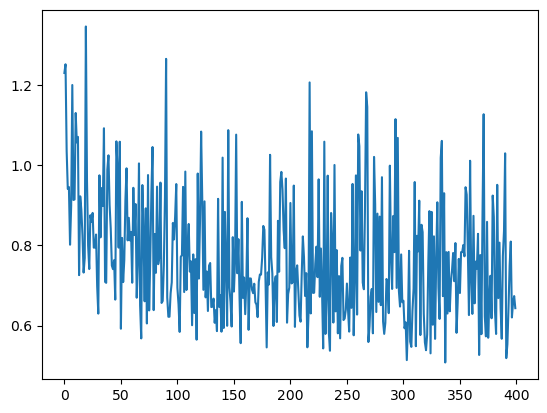

In [60]:
plt.plot(range(out["epochs_2"]), out["bf_loss_step_2"])

### stage 3

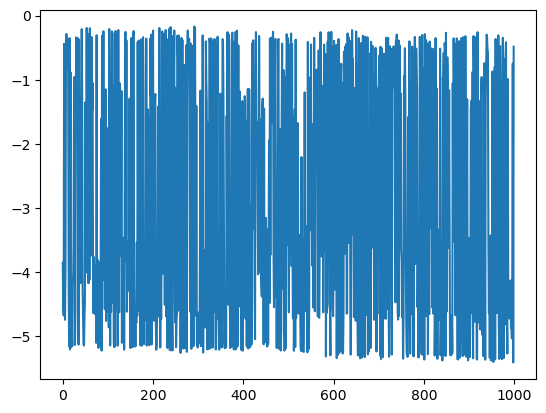

In [61]:
# design
plt.plot(range(out["n_steps_3"]), out["design_loss_step_3"])

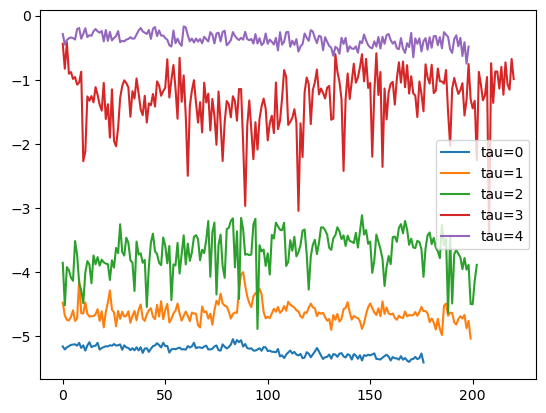

In [62]:
T = 5
for t in range(T):
    loss_tau = [out["design_loss_step_3"][i] for i in range(out["n_steps_3"]) if out["tau_step_3"][i] == t]
    plt.plot(range(len(loss_tau)), loss_tau, label=f"tau={t}")
plt.legend()
plt.show()

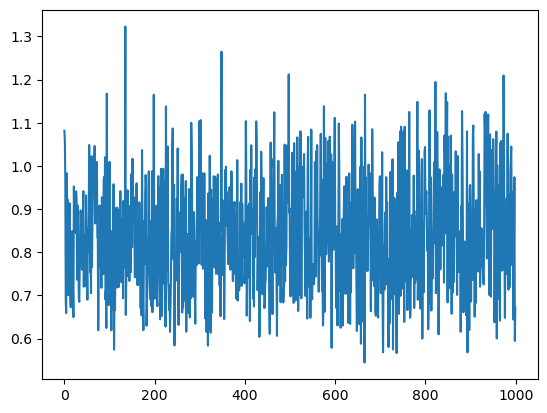

In [63]:
# bf
plt.plot(range(out["epochs_3"]), out["bf_loss_step_3"])

## DAD second

Train bayesflow with random design -> Train DAD with bayesflow posterior -> joint training

In [6]:
path = "results/" + "dad_second_t_5"
out = evaluate_loss(path, "second", 1000, 1)

### stage 1

In [7]:
out

{'epochs_1': 400,
 'n_steps_2': 1000,
 'n_steps_3': 1000,
 'epochs_3': 1000,
 'bf_loss_step_1': [1.577709674835205,
  1.650870442390442,
  1.4601547718048096,
  1.3226139545440674,
  1.3210258483886719,
  1.0440762042999268,
  1.5937845706939697,
  1.6526228189468384,
  1.1425914764404297,
  1.3713884353637695,
  1.339853048324585,
  1.161007046699524,
  1.0952389240264893,
  1.101287603378296,
  1.1199049949645996,
  1.27280592918396,
  0.8499614000320435,
  1.2355387210845947,
  1.1384823322296143,
  1.0260138511657715,
  1.041386604309082,
  1.238755464553833,
  0.9923407435417175,
  1.1214962005615234,
  1.2532199621200562,
  1.1472265720367432,
  0.873279333114624,
  0.8888027667999268,
  1.300675392150879,
  0.9546610116958618,
  0.8050618767738342,
  1.149552345275879,
  1.3606914281845093,
  1.2794541120529175,
  1.2576899528503418,
  1.0753278732299805,
  0.9583141803741455,
  0.842519223690033,
  1.0088227987289429,
  1.0778124332427979,
  1.238279938697815,
  1.0069679021835

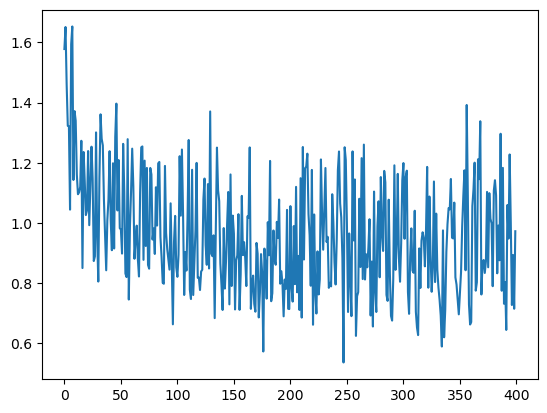

In [65]:
plt.plot(range(out["epochs_1"]), out["bf_loss_step_1"])

### stage 2

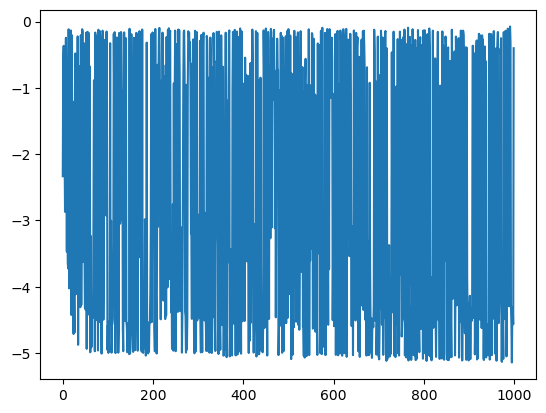

In [66]:
plt.plot(range(out["n_steps_2"]), out["design_loss_step_2"])

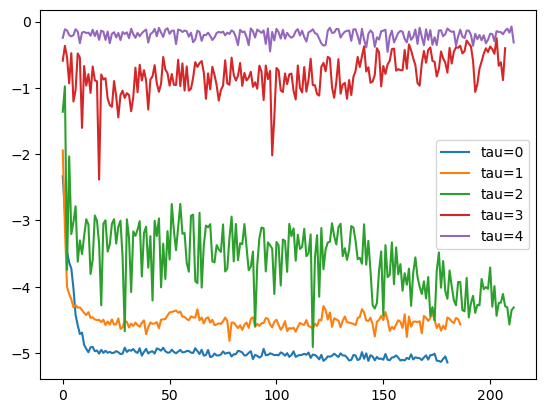

In [67]:
T = 5
for t in range(T):
    loss_tau = [out["design_loss_step_2"][i] for i in range(out["n_steps_2"]) if out["tau_step_2"][i] == t]
    plt.plot(range(len(loss_tau)), loss_tau, label=f"tau={t}")
plt.legend()
plt.show()

### stage 3

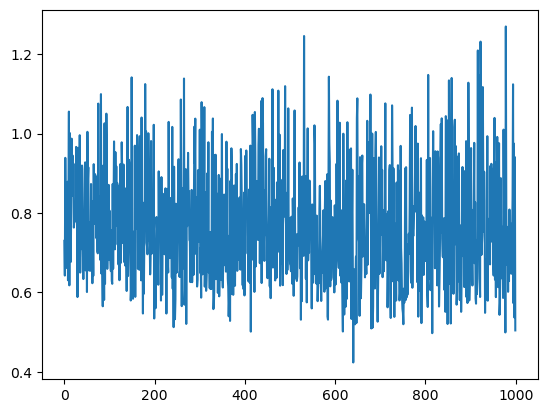

In [68]:
# bf
plt.plot(range(out["epochs_3"]), out["bf_loss_step_3"])

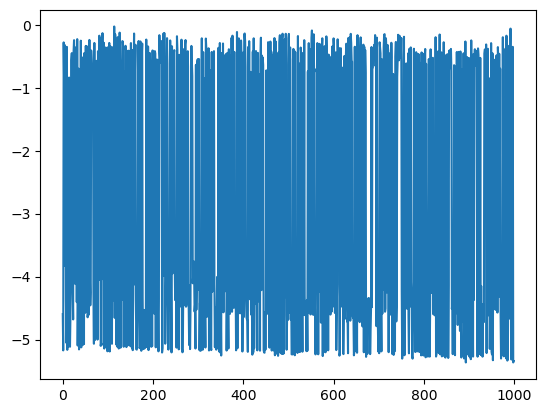

In [69]:
# design
plt.plot(range(out["n_steps_3"]), out["design_loss_step_3"])

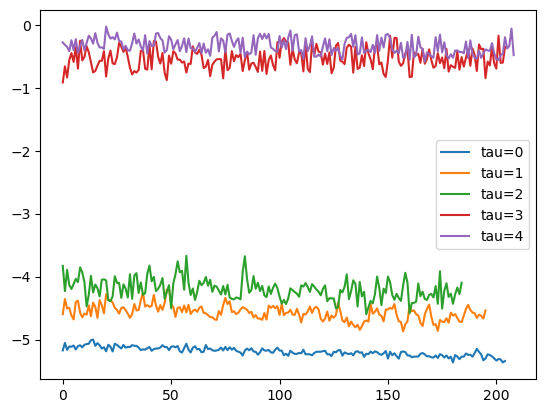

In [70]:
T = 5
for t in range(T):
    loss_tau = [out["design_loss_step_3"][i] for i in range(out["n_steps_3"]) if out["tau_step_3"][i] == t]
    plt.plot(range(len(loss_tau)), loss_tau, label=f"tau={t}")
plt.legend()
plt.show()

## DAD only

In [71]:
path = "results/" + "dad_only_t_5"
out = evaluate_loss(path, "only")

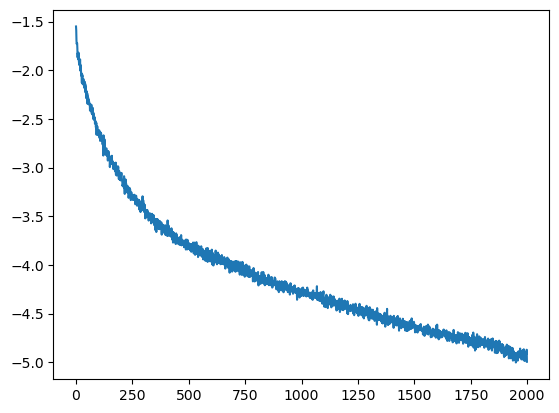

In [72]:
plt.plot(range(out["n_steps_1"]), out["design_loss_step_1"])

# n_history = 8

## DAD first

In [6]:
path = "results/" + "dad_first_t_5_hist_8"
out = evaluate_loss(path, "first", epochs_3 = 1000, steps_per_epoch_3 = 1)

### Stage 1

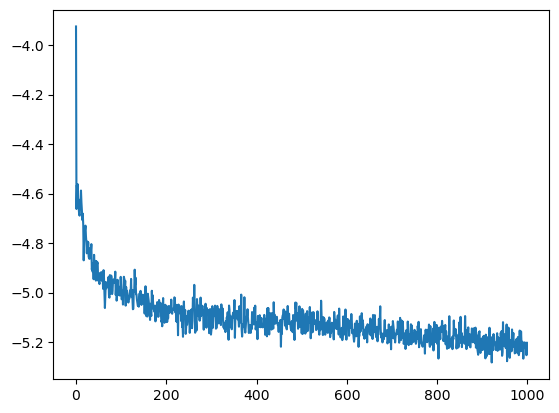

In [7]:
plt.plot(range(out["n_steps_1"]), out["design_loss_step_1"])

### Stage 2

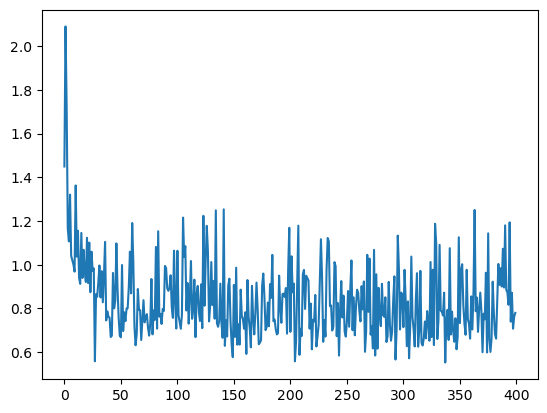

In [8]:
plt.plot(range(out["epochs_2"]), out["bf_loss_step_2"])

### Stage 3

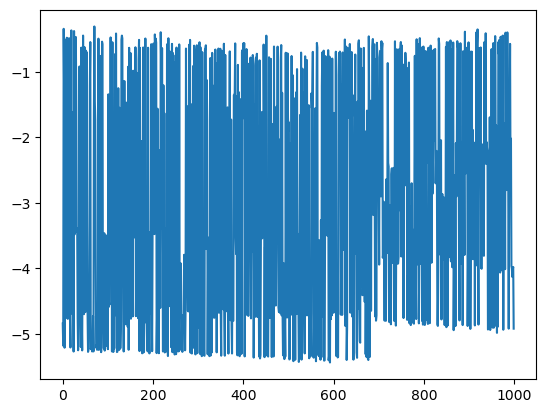

In [9]:
# design
plt.plot(range(out["n_steps_3"]), out["design_loss_step_3"])

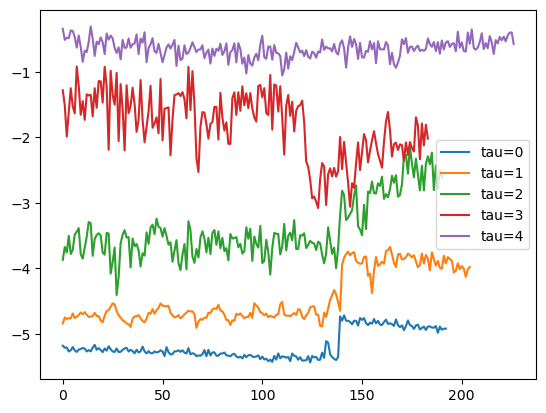

In [10]:
T = 5
for t in range(T):
    loss_tau = [out["design_loss_step_3"][i] for i in range(out["n_steps_3"]) if out["tau_step_3"][i] == t]
    plt.plot(range(len(loss_tau)), loss_tau, label=f"tau={t}")
plt.legend()
plt.show()

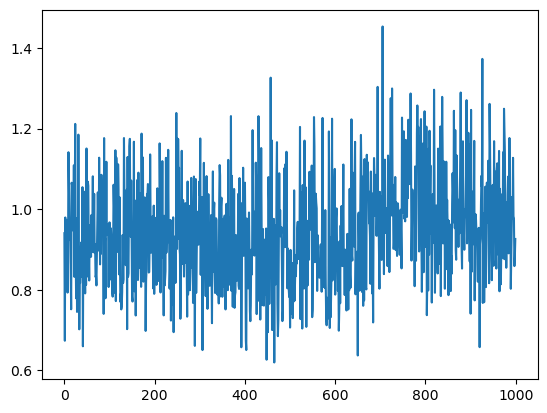

In [11]:
# bf
plt.plot(range(out["epochs_3"]), out["bf_loss_step_3"])

## DAD second

In [12]:
path = "results/" + "dad_second_t_5_hist_8"
out = evaluate_loss(path, "second", 1000, 1)

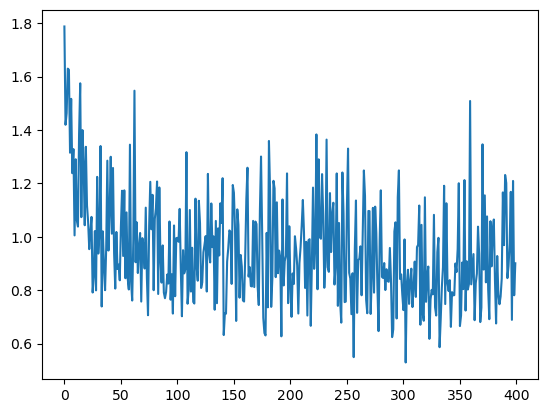

In [13]:
plt.plot(range(out["epochs_1"]), out["bf_loss_step_1"])

### stage 2

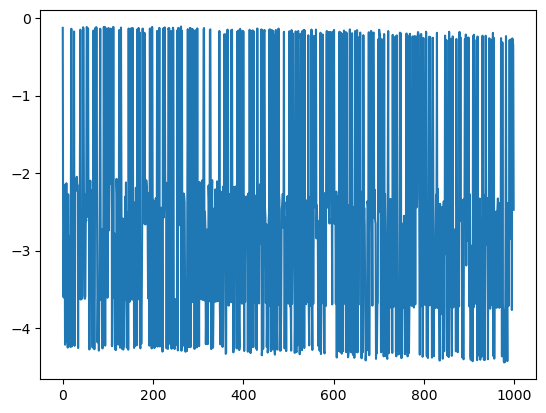

In [14]:
plt.plot(range(out["n_steps_2"]), out["design_loss_step_2"])

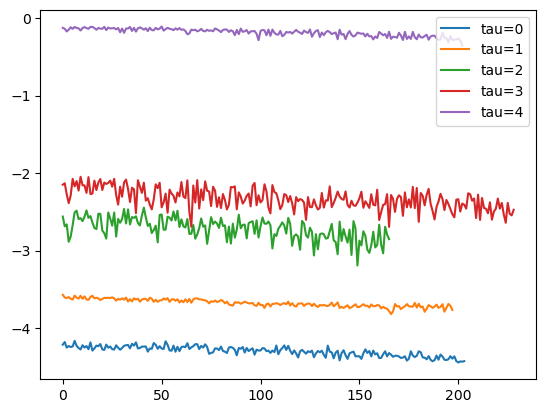

In [15]:
T = 5
for t in range(T):
    loss_tau = [out["design_loss_step_2"][i] for i in range(out["n_steps_2"]) if out["tau_step_2"][i] == t]
    plt.plot(range(len(loss_tau)), loss_tau, label=f"tau={t}")
plt.legend()
plt.show()

### stage 3

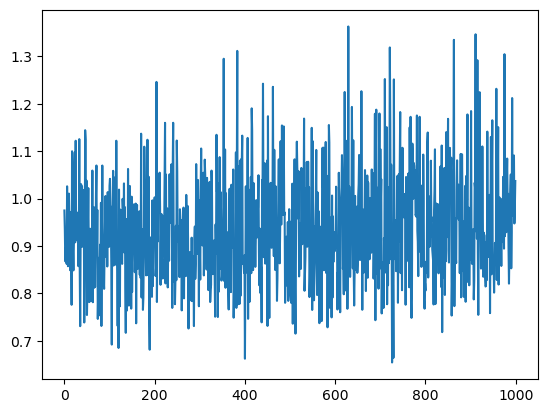

In [16]:
# bf
plt.plot(range(out["epochs_3"]), out["bf_loss_step_3"])

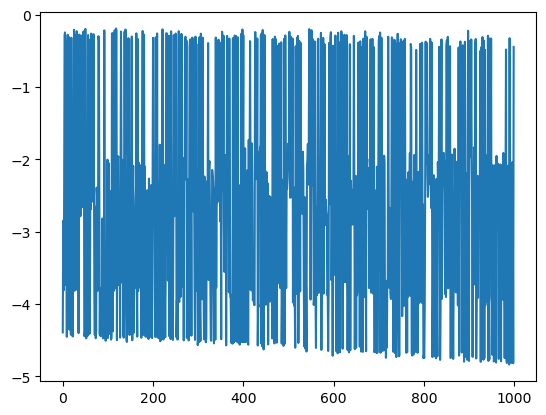

In [17]:
plt.plot(range(out["n_steps_3"]), out["design_loss_step_3"])

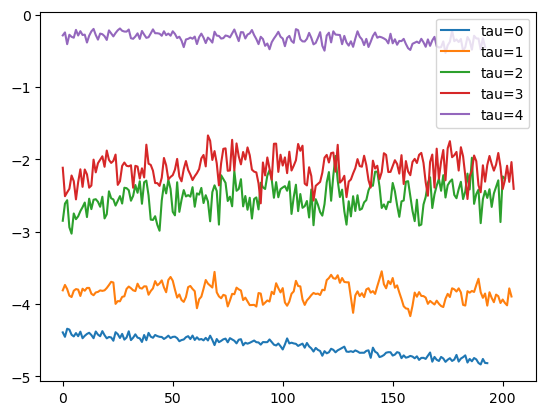

In [18]:
T = 5
for t in range(T):
    loss_tau = [out["design_loss_step_3"][i] for i in range(out["n_steps_3"]) if out["tau_step_3"][i] == t]
    plt.plot(range(len(loss_tau)), loss_tau, label=f"tau={t}")
plt.legend()
plt.show()